### Import Relevant libraries

In [686]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Import data and do an initial look through

In [687]:
raw_csv_data = pd.read_csv('Absenteeism_data.csv')

In [688]:
df = raw_csv_data.copy()

In [689]:
df.head(15)

,ID,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,11,26,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,36,0,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,3,23,15/07/2015,179,51,38,239.554,31,1,0,0,2
3,7,7,16/07/2015,279,5,39,239.554,24,1,2,0,4
4,11,23,23/07/2015,289,36,33,239.554,30,1,2,1,2
5,3,23,10/07/2015,179,51,38,239.554,31,1,0,0,2
6,10,22,17/07/2015,361,52,28,239.554,27,1,1,4,8
7,20,23,24/07/2015,260,50,36,239.554,23,1,4,0,4
8,14,19,06/07/2015,155,12,34,239.554,25,1,2,0,40
9,1,22,13/07/2015,235,11,37,239.554,29,3,1,1,8


In [690]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         700 non-null    int64  
 1   Reason for Absence         700 non-null    int64  
 2   Date                       700 non-null    object 
 3   Transportation Expense     700 non-null    int64  
 4   Distance to Work           700 non-null    int64  
 5   Age                        700 non-null    int64  
 6   Daily Work Load Average    700 non-null    float64
 7   Body Mass Index            700 non-null    int64  
 8   Education                  700 non-null    int64  
 9   Children                   700 non-null    int64  
 10  Pets                       700 non-null    int64  
 11  Absenteeism Time in Hours  700 non-null    int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 65.8+ KB


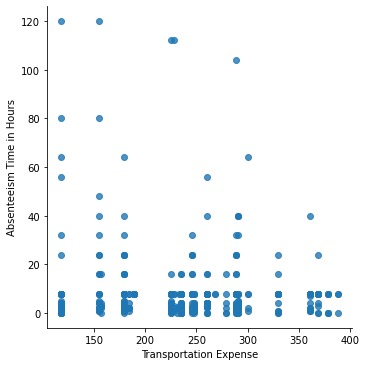

In [691]:
sns.lmplot(data=df,x='Transportation Expense',y='Absenteeism Time in Hours',fit_reg=False)

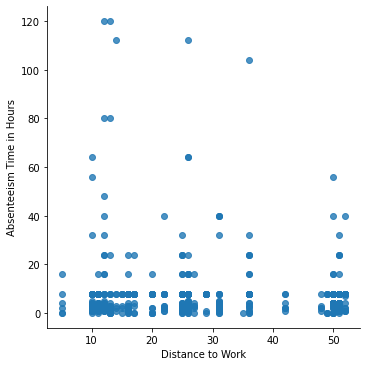

In [692]:
sns.lmplot(data=df,x='Distance to Work',y='Absenteeism Time in Hours',fit_reg=False)

In [693]:
df = df.drop(['ID'],axis = 1)

<AxesSubplot:xlabel='Reason for Absence', ylabel='count'>

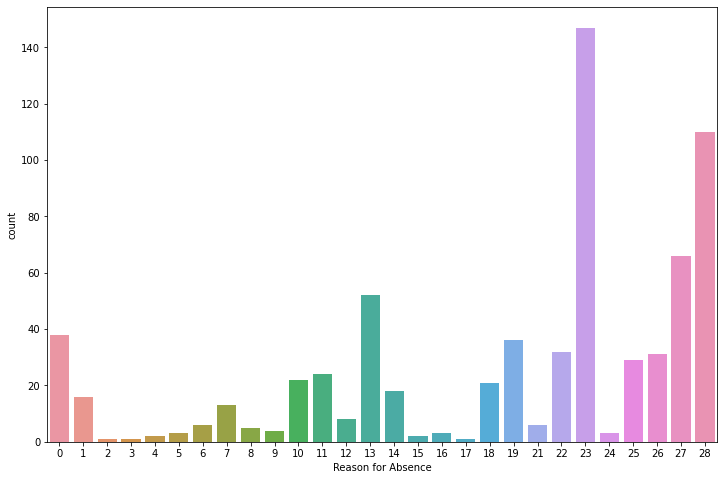

In [694]:
plt.figure(figsize=(12,8))
sns.countplot(data=df,x='Reason for Absence')

In [695]:
sorted(df['Reason for Absence'].unique())

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28]

### Investigate Reason for Absence column and create dummy variables

In [696]:
reason_columns = pd.get_dummies(df['Reason for Absence'],drop_first = True)
reason_columns.head(10)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,21,22,23,24,25,26,27,28
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [697]:
age_dummies = pd.get_dummies(df['Age'])

In [698]:
age_dummies.head(10)

,27,28,29,30,31,32,33,34,36,37,38,39,40,41,43,46,47,48,49,50,58
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
6,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [699]:
reason_columns.columns.values

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 21, 22, 23, 24, 25, 26, 27, 28])

In [700]:
reason_type_1 = reason_columns.loc[:,1:14].max(axis=1)
reason_type_2 = reason_columns.loc[:,15:17].max(axis=1)
reason_type_3 = reason_columns.loc[:,18:21].max(axis=1)
reason_type_4 = reason_columns.loc[:,22:28].max(axis=1)

In [701]:
df = df.drop(['Reason for Absence'],axis=1)

In [702]:
df = pd.concat([df,reason_type_1,reason_type_2,reason_type_3,reason_type_4],axis=1)
df.head(10)

,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,0,1,2,3
0,07/07/2015,289,36,33,239.554,30,1,2,1,4,0,0,0,1
1,14/07/2015,118,13,50,239.554,31,1,1,0,0,0,0,0,0
2,15/07/2015,179,51,38,239.554,31,1,0,0,2,0,0,0,1
3,16/07/2015,279,5,39,239.554,24,1,2,0,4,1,0,0,0
4,23/07/2015,289,36,33,239.554,30,1,2,1,2,0,0,0,1
5,10/07/2015,179,51,38,239.554,31,1,0,0,2,0,0,0,1
6,17/07/2015,361,52,28,239.554,27,1,1,4,8,0,0,0,1
7,24/07/2015,260,50,36,239.554,23,1,4,0,4,0,0,0,1
8,06/07/2015,155,12,34,239.554,25,1,2,0,40,0,0,1,0
9,13/07/2015,235,11,37,239.554,29,3,1,1,8,0,0,0,1


### Update dataframe column names to reflect new dummy variable columns

In [703]:
df.columns.values

array(['Date', 'Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Education',
       'Children', 'Pets', 'Absenteeism Time in Hours', 0, 1, 2, 3],
      dtype=object)

In [704]:
column_names = ['Date', 'Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Education',
       'Children', 'Pets', 'Absenteeism Time in Hours', 'Reason_1', 'Reason_2', 'Reason_3', 'Reason_4']


In [705]:
df.columns = column_names

In [706]:
df.head()

,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Reason_1,Reason_2,Reason_3,Reason_4
0,07/07/2015,289,36,33,239.554,30,1,2,1,4,0,0,0,1
1,14/07/2015,118,13,50,239.554,31,1,1,0,0,0,0,0,0
2,15/07/2015,179,51,38,239.554,31,1,0,0,2,0,0,0,1
3,16/07/2015,279,5,39,239.554,24,1,2,0,4,1,0,0,0
4,23/07/2015,289,36,33,239.554,30,1,2,1,2,0,0,0,1


In [707]:
column_names_reordered = ['Reason_1','Reason_2', 'Reason_3', 'Reason_4','Date', 'Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Education',
       'Children', 'Pets', 'Absenteeism Time in Hours']
df = df[column_names_reordered]

In [708]:
df.head()

,Reason_1,Reason_2,Reason_3,Reason_4,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,0,0,0,1,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,0,0,0,0,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,0,0,0,1,15/07/2015,179,51,38,239.554,31,1,0,0,2
3,1,0,0,0,16/07/2015,279,5,39,239.554,24,1,2,0,4
4,0,0,0,1,23/07/2015,289,36,33,239.554,30,1,2,1,2


### Extract date as a datetime object for better readability

In [709]:
type(df['Date'][0])

str

In [710]:
df['Date'] = pd.to_datetime(df['Date'],format='%d/%m/%Y')

In [711]:
df['Date'].head()

0   2015-07-07
1   2015-07-14
2   2015-07-15
3   2015-07-16
4   2015-07-23
Name: Date, dtype: datetime64[ns]

In [712]:
df['Date'][0].month

7

In [713]:
list_months = []
df.shape[0]

700

In [714]:
for i in range(df.shape[0]):
    list_months.append(df['Date'][i].month)

In [715]:
df['Month Value'] = list_months

In [716]:
len(list_months)

700

In [717]:
df['Date'][0].weekday()

1

In [718]:
def date_to_weekday(date_value):
    return date_value.weekday()

In [719]:
df['Day of the week'] = df['Date'].apply(date_to_weekday)

In [720]:
df.drop(['Date'],axis=1).head(10)

,Reason_1,Reason_2,Reason_3,Reason_4,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Month Value,Day of the week
0,0,0,0,1,289,36,33,239.554,30,1,2,1,4,7,1
1,0,0,0,0,118,13,50,239.554,31,1,1,0,0,7,1
2,0,0,0,1,179,51,38,239.554,31,1,0,0,2,7,2
3,1,0,0,0,279,5,39,239.554,24,1,2,0,4,7,3
4,0,0,0,1,289,36,33,239.554,30,1,2,1,2,7,3
5,0,0,0,1,179,51,38,239.554,31,1,0,0,2,7,4
6,0,0,0,1,361,52,28,239.554,27,1,1,4,8,7,4
7,0,0,0,1,260,50,36,239.554,23,1,4,0,4,7,4
8,0,0,1,0,155,12,34,239.554,25,1,2,0,40,7,0
9,0,0,0,1,235,11,37,239.554,29,3,1,1,8,7,0


In [721]:
df.columns.values

array(['Reason_1', 'Reason_2', 'Reason_3', 'Reason_4', 'Date',
       'Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Education',
       'Children', 'Pets', 'Absenteeism Time in Hours', 'Month Value',
       'Day of the week'], dtype=object)

In [722]:
df = df[['Reason_1', 'Reason_2', 'Reason_3', 'Reason_4','Month Value',
       'Day of the week','Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Education',
       'Children', 'Pets', 'Absenteeism Time in Hours']]

In [723]:
df.head()

,Reason_1,Reason_2,Reason_3,Reason_4,Month Value,Day of the week,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,0,0,0,1,7,1,289,36,33,239.554,30,1,2,1,4
1,0,0,0,0,7,1,118,13,50,239.554,31,1,1,0,0
2,0,0,0,1,7,2,179,51,38,239.554,31,1,0,0,2
3,1,0,0,0,7,3,279,5,39,239.554,24,1,2,0,4
4,0,0,0,1,7,3,289,36,33,239.554,30,1,2,1,2


In [724]:
df['Education']= df['Education'].map({1:0,2:1,3:1,4:1})

In [725]:
df['Education'].value_counts()

0    583
1    117
Name: Education, dtype: int64

### Create graphs to explore various counts with respect to Age,Children or Pets

<AxesSubplot:xlabel='Age', ylabel='count'>

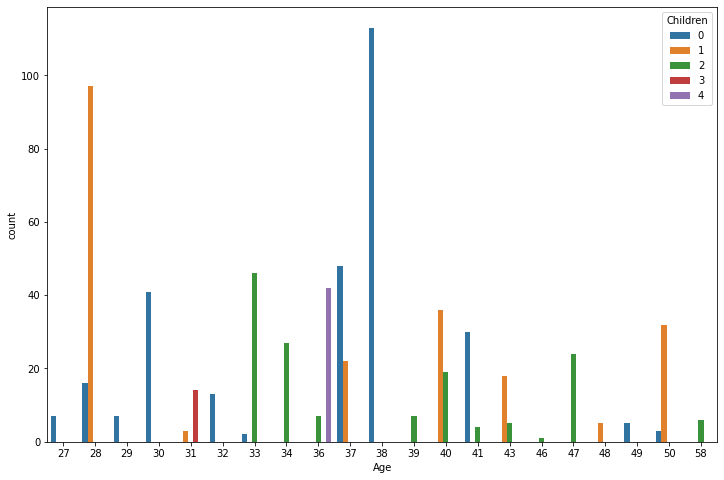

In [726]:
plt.figure(figsize=(12,8))
sns.countplot(data=df,x='Age',hue='Children')

<AxesSubplot:xlabel='Pets', ylabel='count'>

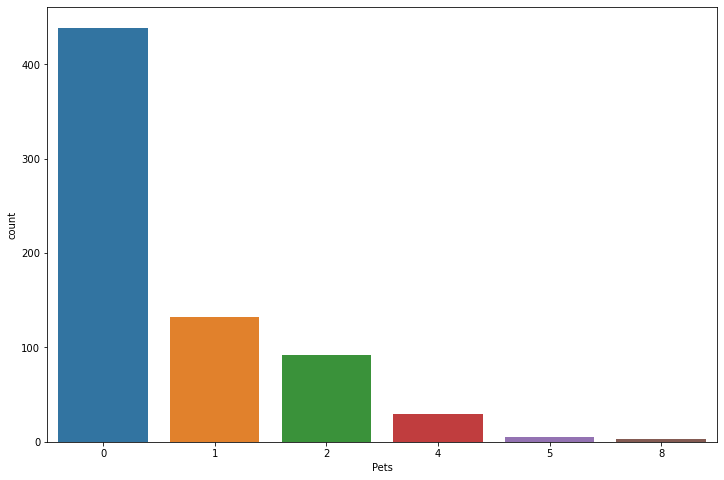

In [727]:
plt.figure(figsize=(12,8))
sns.countplot(data=df,x='Pets')

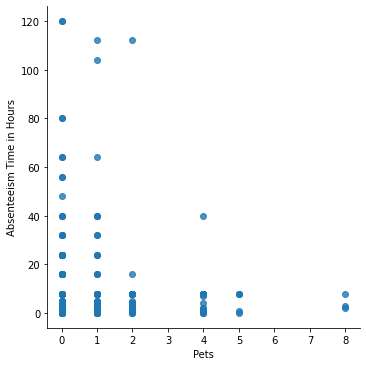

In [728]:
sns.lmplot(data=df,x='Pets',y='Absenteeism Time in Hours',fit_reg=False)

<AxesSubplot:xlabel='Children', ylabel='count'>

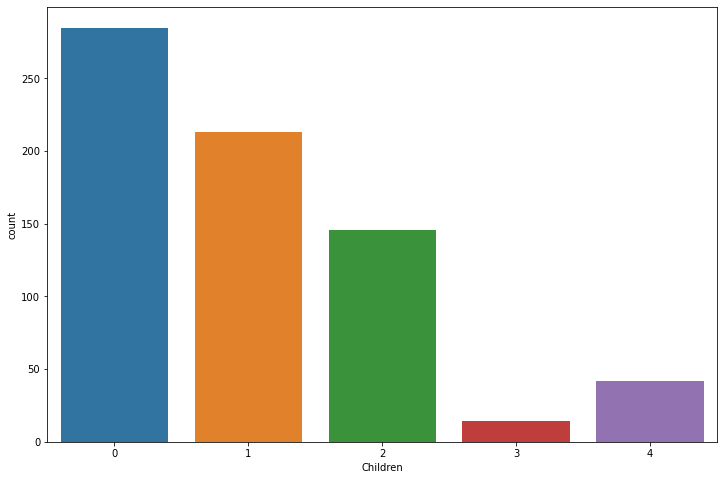

In [729]:
plt.figure(figsize=(12,8))
sns.countplot(data=df,x='Children')

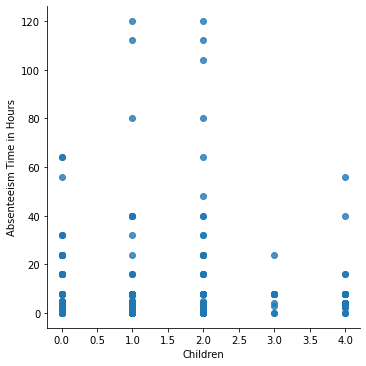

In [730]:
sns.lmplot(data=df,x='Children',y='Absenteeism Time in Hours',fit_reg=False)

### Create the targets by determining what an excessive amount of abseenteism is, in this case it is over 2 hours absent

In [731]:
targets = np.where(df['Absenteeism Time in Hours'] > df['Absenteeism Time in Hours'].median(),1,0)

In [732]:
df['Excessive Absenteeism'] = targets

In [733]:
df.head()

,Reason_1,Reason_2,Reason_3,Reason_4,Month Value,Day of the week,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Excessive Absenteeism
0,0,0,0,1,7,1,289,36,33,239.554,30,0,2,1,4,1
1,0,0,0,0,7,1,118,13,50,239.554,31,0,1,0,0,0
2,0,0,0,1,7,2,179,51,38,239.554,31,0,0,0,2,0
3,1,0,0,0,7,3,279,5,39,239.554,24,0,2,0,4,1
4,0,0,0,1,7,3,289,36,33,239.554,30,0,2,1,2,0


In [734]:
df = df.drop(['Absenteeism Time in Hours','Day of the week','Daily Work Load Average','Distance to Work'],axis=1)

### Create a custom scaler such that it will not effect dummy variables, otherwise I would have used a pre-built scaler such as StandardScaler from sklearn

In [735]:
unscaled_inputs = df.iloc[:,0:-1]

In [736]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler


class CustomScaler(BaseEstimator,TransformerMixin): 

    def __init__(self,columns,copy=True,with_mean=True,with_std=True):
        self.scaler = StandardScaler(copy,with_mean,with_std)
        self.columns = columns
        self.mean_ = None
        self.var_ = None
    
    def fit(self, X, y=None):
        self.scaler.fit(X[self.columns], y)
        self.mean_ = np.mean(X[self.columns])
        self.var_ = np.var(X[self.columns])
        return self
    

    def transform(self, X, y=None, copy=None):
        init_col_order = X.columns
        X_scaled = pd.DataFrame(self.scaler.transform(X[self.columns]), columns=self.columns)
        X_not_scaled = X.loc[:,~X.columns.isin(self.columns)]
        return pd.concat([X_not_scaled, X_scaled], axis=1)[init_col_order]

In [737]:
unscaled_inputs.columns.values

array(['Reason_1', 'Reason_2', 'Reason_3', 'Reason_4', 'Month Value',
       'Transportation Expense', 'Age', 'Body Mass Index', 'Education',
       'Children', 'Pets'], dtype=object)

In [738]:
columns_to_omit = ['Reason_1', 'Reason_2', 'Reason_3', 'Reason_4','Education']
columns_to_scale = [x for x in unscaled_inputs.columns.values if x not in columns_to_omit]

In [739]:
absenteeism_scaler = CustomScaler(columns_to_scale)
absenteeism_scaler.fit(unscaled_inputs)
scaled_inputs = absenteeism_scaler.transform(unscaled_inputs)

In [740]:
scaled_inputs.head(10)

,Reason_1,Reason_2,Reason_3,Reason_4,Month Value,Transportation Expense,Age,Body Mass Index,Education,Children,Pets
0,0,0,0,1,0.182726,1.005844,-0.536062,0.767431,0,0.880469,0.268487
1,0,0,0,0,0.182726,-1.574681,2.130803,1.002633,0,-0.019280,-0.589690
2,0,0,0,1,0.182726,-0.654143,0.248310,1.002633,0,-0.919030,-0.589690
3,1,0,0,0,0.182726,0.854936,0.405184,-0.643782,0,0.880469,-0.589690
4,0,0,0,1,0.182726,1.005844,-0.536062,0.767431,0,0.880469,0.268487
5,0,0,0,1,0.182726,-0.654143,0.248310,1.002633,0,-0.919030,-0.589690
6,0,0,0,1,0.182726,2.092381,-1.320435,0.061825,0,-0.019280,2.843016
7,0,0,0,1,0.182726,0.568211,-0.065439,-0.878984,0,2.679969,-0.589690
8,0,0,1,0,0.182726,-1.016322,-0.379188,-0.408580,0,0.880469,-0.589690
9,0,0,0,1,0.182726,0.190942,0.091435,0.532229,1,-0.019280,0.268487


### Now that the data is all pre-processed split it up to fit to a logisitcal regression

In [741]:
from sklearn.model_selection import train_test_split

In [742]:
X = scaled_inputs
y = targets

In [743]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.8,random_state=20)

In [744]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix

In [745]:
reg = LogisticRegression()
reg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [746]:
reg.score(X_train,y_train)

0.7732142857142857

In [747]:
model_outputs = reg.predict(X_train)

In [748]:
feature_name = unscaled_inputs.columns.values

summary_table = pd.DataFrame(columns=['Feature Name'], data=feature_name)

summary_table['Coefficient'] = np.transpose(reg.coef_)

summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept',reg.intercept_[0]]
summary_table['Odds_ratio'] = np.exp(summary_table.Coefficient)

### Summary Table consists of the Features we are testing against and their Coefficients and Odds Ratio. The Coeffecients show how strongly correlated the feature is with absenteeism. The Odds Ratio denote how likely someone is to be excessively absent given they cite that specific feature

In [749]:
summary_table = summary_table.sort_index()
summary_table

,Feature Name,Coefficient,Odds_ratio
0,Intercept,-1.647455,0.192539
1,Reason_1,2.800197,16.447892
2,Reason_2,0.951884,2.590585
3,Reason_3,3.115553,22.545903
4,Reason_4,0.839001,2.314054
5,Month Value,0.158930,1.172256
6,Transportation Expense,0.605284,1.831773
7,Age,-0.169891,0.843757
8,Body Mass Index,0.279811,1.322880
9,Education,-0.210533,0.810152


In [750]:
pred = reg.predict(X_test)

In [751]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.75      0.80      0.77        74
           1       0.75      0.70      0.72        66

    accuracy                           0.75       140
   macro avg       0.75      0.75      0.75       140
weighted avg       0.75      0.75      0.75       140



In [752]:
predicted_proba = reg.predict_proba(X_test)

In [753]:
predicted_proba

array([[0.71340413, 0.28659587],
       [0.58724228, 0.41275772],
       [0.44020821, 0.55979179],
       [0.78159464, 0.21840536],
       [0.08410854, 0.91589146],
       [0.33487603, 0.66512397],
       [0.29984576, 0.70015424],
       [0.13103971, 0.86896029],
       [0.78625404, 0.21374596],
       [0.74903632, 0.25096368],
       [0.49397598, 0.50602402],
       [0.22484913, 0.77515087],
       [0.07129151, 0.92870849],
       [0.73178133, 0.26821867],
       [0.30934135, 0.69065865],
       [0.5471671 , 0.4528329 ],
       [0.55052275, 0.44947725],
       [0.5392707 , 0.4607293 ],
       [0.40201117, 0.59798883],
       [0.05361575, 0.94638425],
       [0.7003009 , 0.2996991 ],
       [0.78159464, 0.21840536],
       [0.42037128, 0.57962872],
       [0.42037128, 0.57962872],
       [0.24783565, 0.75216435],
       [0.74566259, 0.25433741],
       [0.51017274, 0.48982726],
       [0.85690195, 0.14309805],
       [0.20349733, 0.79650267],
       [0.78159464, 0.21840536],
       [0.